In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import random
random.seed(1100038344)
import survivalstan
import numpy as np
import pandas as pd
from stancache import stancache
from matplotlib import pyplot as plt
from statsmodels import datasets

INFO:stancache.seed:Setting seed to 1245502385


In [5]:
#statsmodels.datasets made easy to load a dataset from R http://bit.ly/2DcpAOO
df = 

TypeError: get_data_home() got an unexpected keyword argument 'cache'

In [6]:
?datasets.get_rdataset



In [3]:
print(survivalstan.models.pem_survival_model)

/*  Variable naming:
 // dimensions
 N          = total number of observations (length of data)
 S          = number of sample ids
 T          = max timepoint (number of timepoint ids)
 M          = number of covariates
 
 // main data matrix (per observed timepoint*record)
 s          = sample id for each obs
 t          = timepoint id for each obs
 event      = integer indicating if there was an event at time t for sample s
 x          = matrix of real-valued covariates at time t for sample n [N, X]
 
 // timepoint-specific data (per timepoint, ordered by timepoint id)
 t_obs      = observed time since origin for each timepoint id (end of period)
 t_dur      = duration of each timepoint period (first diff of t_obs)
 
*/
// Jacqueline Buros Novik <jackinovik@gmail.com>

data {
  // dimensions
  int<lower=1> N;
  int<lower=1> S;
  int<lower=1> T;
  int<lower=0> M;
  
  // data matrix
  int<lower=1, upper=N> s[N];     // sample id
  int<lower=1, upper=T> t[N];     // timepoint id
  int<

In [4]:
#Simulate survival data

In [7]:
df = stancache.cached(
    survivalstan.sim.sim_data_exp_correlated,
    N = 100,
    censor_time = 20,
    rate_form = '1 + sex',
    rate_coefs = [-3, 0.5],
)
df['age_centered'] = df.age - df.age.mean()

INFO:stancache.stancache:sim_data_exp_correlated: cache_filename set to sim_data_exp_correlated.cached.N_100.censor_time_20.rate_coefs_54462717316.rate_form_1 + sex.pkl
INFO:stancache.stancache:sim_data_exp_correlated: Starting execution
INFO:stancache.stancache:sim_data_exp_correlated: Execution completed (0:00:00.081431 elapsed)
INFO:stancache.stancache:sim_data_exp_correlated: Saving results to cache


In [6]:
??stancache.cached

In [7]:
df.head()

,age,sex,rate,true_t,t,event,index,age_centered
0,55,female,0.049787,3.087115,3.087115,True,0,0.47
1,63,female,0.049787,6.112748,6.112748,True,1,8.47
2,62,female,0.049787,25.765118,20.000000,False,2,7.47
3,50,female,0.049787,30.233038,20.000000,False,3,-4.53
4,50,female,0.049787,8.381779,8.381779,True,4,-4.53


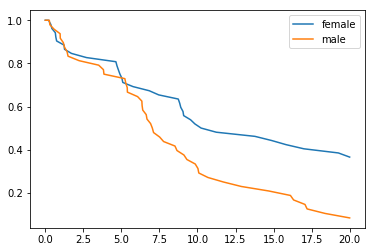

In [8]:
survivalstan.utils.plot_observed_survival(df=df[df['sex']=='female'], event_col='event', time_col='t', label='female')
survivalstan.utils.plot_observed_survival(df=df[df['sex']=='male'], event_col='event', time_col='t', label='male')
plt.legend()

In [9]:
#transform data to long or per time point
dlong = stancache.cached(
    survivalstan.prep_data_long_surv,
    df = df, event_col = 'event', time_col = 't'
)

INFO:stancache.stancache:prep_data_long_surv: cache_filename set to prep_data_long_surv.cached.df_98317976757.event_col_event.time_col_t.pkl
INFO:stancache.stancache:prep_data_long_surv: Starting execution
INFO:stancache.stancache:prep_data_long_surv: Execution completed (0:00:00.467671 elapsed)
INFO:stancache.stancache:prep_data_long_surv: Saving results to cache


In [10]:
dlong.query('index == 1').sort_values('end_time')

,age,sex,rate,true_t,t,event,index,age_centered,key,end_time,end_failure
147,44,male,0.082085,9.305421,9.305421,True,1,-10.0,1,0.213796,False
86,44,male,0.082085,9.305421,9.305421,True,1,-10.0,1,0.263283,False
99,44,male,0.082085,9.305421,9.305421,True,1,-10.0,1,0.300275,False
142,44,male,0.082085,9.305421,9.305421,True,1,-10.0,1,0.360441,False
151,44,male,0.082085,9.305421,9.305421,True,1,-10.0,1,0.434708,False
95,44,male,0.082085,9.305421,9.305421,True,1,-10.0,1,0.579426,False
85,44,male,0.082085,9.305421,9.305421,True,1,-10.0,1,0.658473,False
120,44,male,0.082085,9.305421,9.305421,True,1,-10.0,1,0.690643,False
105,44,male,0.082085,9.305421,9.305421,True,1,-10.0,1,0.745316,False
132,44,male,0.082085,9.305421,9.305421,True,1,-10.0,1,0.974958,False


In [11]:
#Fit stan model
?survivalstan.fit_stan_survival_model

In [ ]:
testfit = survivalstan.fit_stan_survival_model(
    model_cohort = 'test model',
    model_code = survivalstan.models.pem_survival_model,
    df = dlong,
    sample_col = 'index',
    timepoint_end_col = 'end_time',
    event_col = 'end_failure',
    formula = '~ age_centered + sex',
    iter = 5000,
    chains = 4,
    seed = 9001,
    FIT_FUN = stancache.cached_stan_fit,
    )

INFO:stancache.stancache:Step 1: Get compiled model code, possibly from cache
INFO:stancache.stancache:StanModel: cache_filename set to anon_model.cython_0_26_1.model_code_5118842489520038317.pystan_2_17_0_0.stanmodel.pkl
INFO:stancache.stancache:StanModel: Starting execution
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_40e674354a3ed49066be24f1933b1992 NOW.
INFO:stancache.stancache:StanModel: Execution completed (0:01:04.899947 elapsed)
INFO:stancache.stancache:StanModel: Saving results to cache
INFO:stancache.stancache:Step 2: Get posterior draws from model, possibly from cache
INFO:stancache.stancache:sampling: cache_filename set to anon_model.cython_0_26_1.model_code_5118842489520038317.pystan_2_17_0_0.stanfit.chains_4.data_79297565927.iter_5000.seed_9001.pkl
INFO:stancache.stancache:sampling: Starting execution
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (mos